In [6]:
#Adding path to parent directory
import numpy as np
import os
import sys
sys.path.insert(0, os.path.dirname(os.getcwd()))

#Loading black box utilities
from evaluation.blackbox_util import BlackBoxSimulator
dataset_utilities = BlackBoxSimulator().load_breast_cancer_utilities()
[X_train, y_train, X_test, y_test, features, model, mode, categorical_features, sample_idx] = dataset_utilities.values()

assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

print(f"Prediction model type = {mode}")
print(f"Number of categorical featues = {len(categorical_features)}")

print ('X', X_train.shape)
print ('Y', y_train.shape)
print ('X test', X_test.shape)
print ('Y test ', y_test.shape)
print ('features ', features)
print ('mode ', mode)
print ('categorical_features ', categorical_features)
print ('sample_idx ', sample_idx)



R2 score for the model on test set = 0.9298245614035088
Prediction model type = classification
Number of categorical featues = 0
X (512, 30)
Y (512,)
X test (57, 30)
Y test  (57,)
features  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
mode  classification
categorical_features  []
sample_idx  [44  1 25 39  8 29 40 42 41 13]


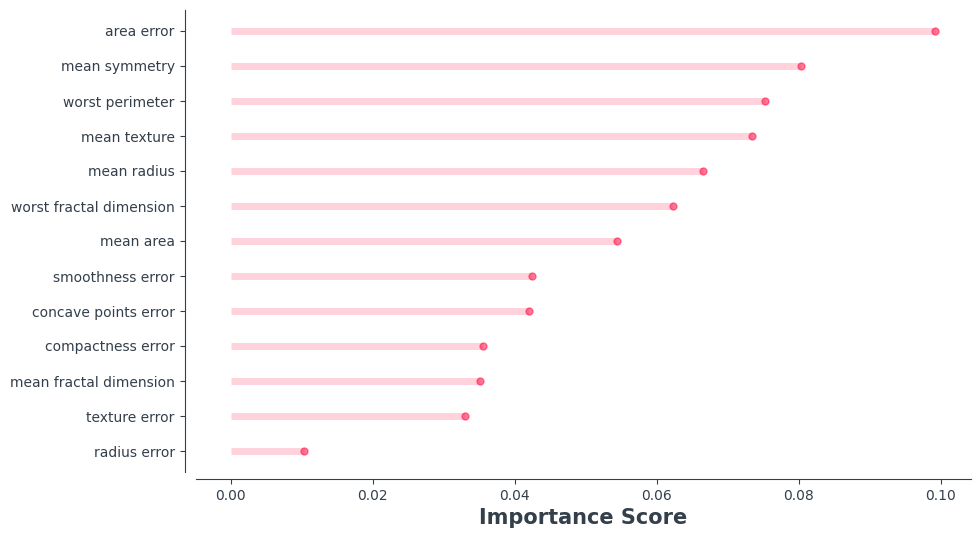

In [7]:
#Default settings
from unravel.tabular import UnRAVELTabularExplainer

#Sample to be explained
sample_idx = sample_idx[0]

#Generating initial starting point
X_init = np.array([X_test[sample_idx]])

#Initializing the explainer object
f_e = UnRAVELTabularExplainer(model, X_train, categorical_features = categorical_features, mode = mode)

explanation = f_e.explain(X_init = X_init, feature_names = features, alpha = "FUR", max_iter = 50, importance_method="ARD")

<StemContainer object of 3 artists>

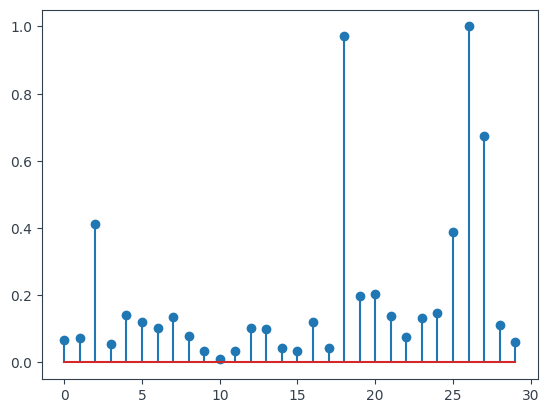

In [8]:
import matplotlib.pyplot as plt
plt.stem(explanation)